In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime as dt
import pandas as pd

In [4]:
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
epoch = 10

In [64]:
stock_code = '005930'
crlng_year = '2010'
Time = str(dt.datetime.now())[:19]
Time = Time.replace('-', '')
Time = Time.replace(':', '')
Time = Time.replace(' ', '')

df = fdr.DataReader(stock_code, crlng_year)
df.to_csv(Time + '-' + stock_code + '-' + crlng_year + '.csv', sep=',', na_rep='NaN')

dataframe = pd.read_csv(Time + '-' + stock_code + '-' + crlng_year + '.csv', delimiter = ',', header = 0)

del dataframe["Change"]
del dataframe["Date"]
dataframe = dataframe[['Open', 'High', 'Low', 'Volume', 'Close']]

xy = dataframe.to_numpy()
xy = xy[::-1]
print(xy)

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

[[   67100    68300    67100 18872326    68200]
 [   68400    68600    66700 43811016    66700]
 [   68000    68400    67600 14063434    68200]
 ...
 [   16580    16820    16520   459755    16820]
 [   16520    16580    16300   559219    16440]
 [   16060    16180    16000   239271    16180]]


In [65]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    
    return numerator / (denominator + 1e-7)

In [66]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [67]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    
    return np.array(dataX), np.array(dataY)

In [5]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

NameError: name 'build_dataset' is not defined

In [69]:
print(trainX.shape, trainY.shape)

(1878, 7, 5) (1878, 1)


In [6]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.LSTM(units = 1, input_shape =  (seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units = output_dim, activation = "tanh"))

print(tf.model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
tf.model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(lr = learning_rate))
tf.model.fit(trainX, trainY, epochs = epoch)

Epoch 1/10
59/59 [==============================] - 0s 2ms/step - loss: 1.2590e-04
Epoch 2/10
59/59 [==============================] - 0s 2ms/step - loss: 9.6608e-05
Epoch 3/10
59/59 [==============================] - 0s 2ms/step - loss: 9.6374e-05
Epoch 4/10
59/59 [==============================] - 0s 2ms/step - loss: 1.0072e-04
Epoch 5/10
59/59 [==============================] - 0s 2ms/step - loss: 9.7444e-05
Epoch 6/10
59/59 [==============================] - 0s 2ms/step - loss: 1.1424e-04
Epoch 7/10
59/59 [==============================] - 0s 2ms/step - loss: 1.0082e-04
Epoch 8/10
59/59 [==============================] - 0s 2ms/step - loss: 1.0792e-04
Epoch 9/10
59/59 [==============================] - 0s 2ms/step - loss: 1.0479e-04
Epoch 10/10
59/59 [==============================] - 0s 2ms/step - loss: 1.3647e-04


In [76]:
test_predict = tf.model.predict(testX)

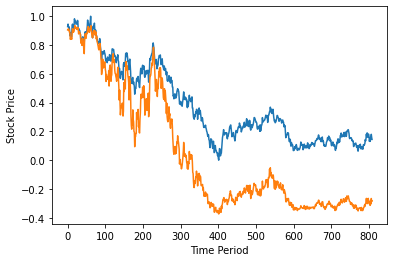

In [77]:
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()